In [1]:
!pwd

/workspace/runs/baseline/e0/client


In [5]:
import sys
sys.path.append('/workspace')
sys.path

['/usr/local/lib/python312.zip',
 '/usr/local/lib/python3.12',
 '/usr/local/lib/python3.12/lib-dynload',
 '',
 '/usr/local/lib/python3.12/site-packages',
 '/workspace/src',
 '/workspace']

In [6]:

import pandas as pd
import matplotlib.pyplot as plt
from qtb.analytics.analyze import QLogAnalyzer

QLOG_FILE = r"/workspace/runs/baseline/e0/client/d8ea3f73306782cf.qlog"
print("Analyzing:", QLOG_FILE)

qla = QLogAnalyzer(QLOG_FILE)


Analyzing: /workspace/runs/baseline/e0/client/d8ea3f73306782cf.qlog


In [7]:

cwnd_df = pd.DataFrame(qla.analyze_cwnd())
rtt_df  = pd.DataFrame(qla.analyze_rtt())
loss_df = pd.DataFrame(qla.analyze_loss())
goodput = qla.analyze_goodput()

cwnd_df.head(), rtt_df.head(), loss_df.head(), goodput


(    cwnd  bytes_in_flight          time
 0  12000              524  1.764309e+12
 1  12524                0  1.764309e+12
 2  12524                0  1.764309e+12
 3  12524              105  1.764309e+12
 4  12524              357  1.764309e+12,
            time   min_rtt  smoothed_rtt  latest_rtt  rtt_variance
 0  1.764309e+12       NaN           NaN         NaN           NaN
 1  1.764309e+12  3.286541      3.286541    3.286541      1.643271
 2  1.764309e+12       NaN           NaN         NaN           NaN
 3  1.764309e+12       NaN           NaN         NaN           NaN
 4  1.764309e+12       NaN           NaN         NaN           NaN,
 Empty DataFrame
 Columns: []
 Index: [],
 {'bytes': 2995872,
  'duration': 30.12143896484375,
  'goodput_mbps': 0.7956783216091723})

In [8]:

if not cwnd_df.empty:
    t0 = cwnd_df['time'].iloc[0]
    cwnd_df['time_rel'] = cwnd_df['time'] - t0

if not rtt_df.empty:
    t0 = rtt_df['time'].iloc[0]
    rtt_df['time_rel'] = rtt_df['time'] - t0

loss_df


""


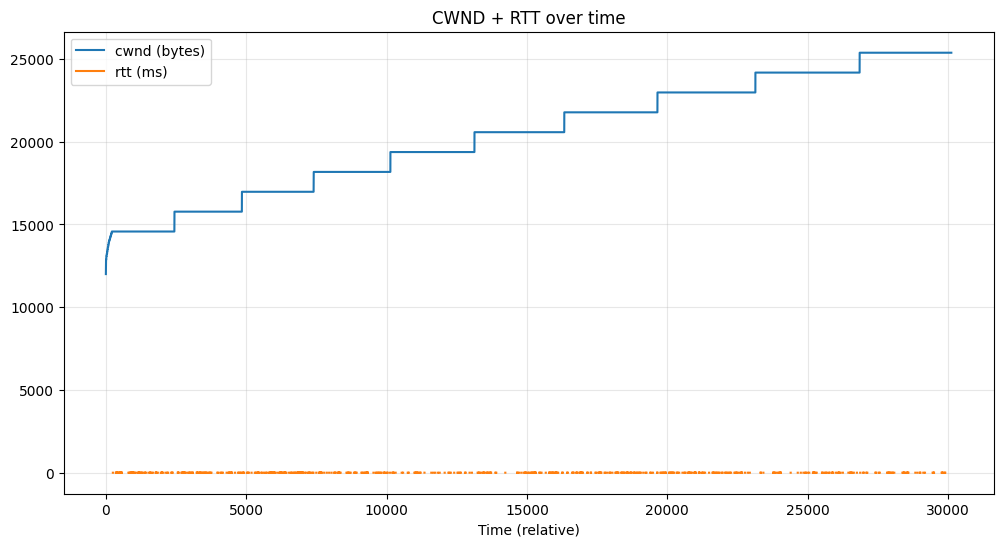

In [9]:

plt.figure(figsize=(12,6))

if not cwnd_df.empty:
    plt.plot(cwnd_df['time_rel'], cwnd_df['cwnd'], label="cwnd (bytes)")

if not rtt_df.empty:
    plt.plot(rtt_df['time_rel'], rtt_df['smoothed_rtt'], label="rtt (ms)")

plt.grid(True, alpha=0.3)
plt.legend()
plt.title("CWND + RTT over time")
plt.xlabel("Time (relative)")
plt.show()


In [10]:

summary = {
    "avg_cwnd": cwnd_df["cwnd"].mean() if not cwnd_df.empty else None,
    "max_cwnd": cwnd_df["cwnd"].max() if not cwnd_df.empty else None,
    "avg_rtt": rtt_df["smoothed_rtt"].mean() if not rtt_df.empty else None,
    "loss_events": len(loss_df),
    "goodput_mbps": goodput["goodput_mbps"],
}

summary


{'avg_cwnd': np.float64(20371.118453608247),
 'max_cwnd': np.int64(25371),
 'avg_rtt': np.float64(1.9830494827250529),
 'loss_events': 0,
 'goodput_mbps': 0.7956783216091723}